<a href="https://colab.research.google.com/github/kinto1/Semantic-streetview/blob/main/%EB%8F%84%EB%A9%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving 1.jpg to 1.jpg


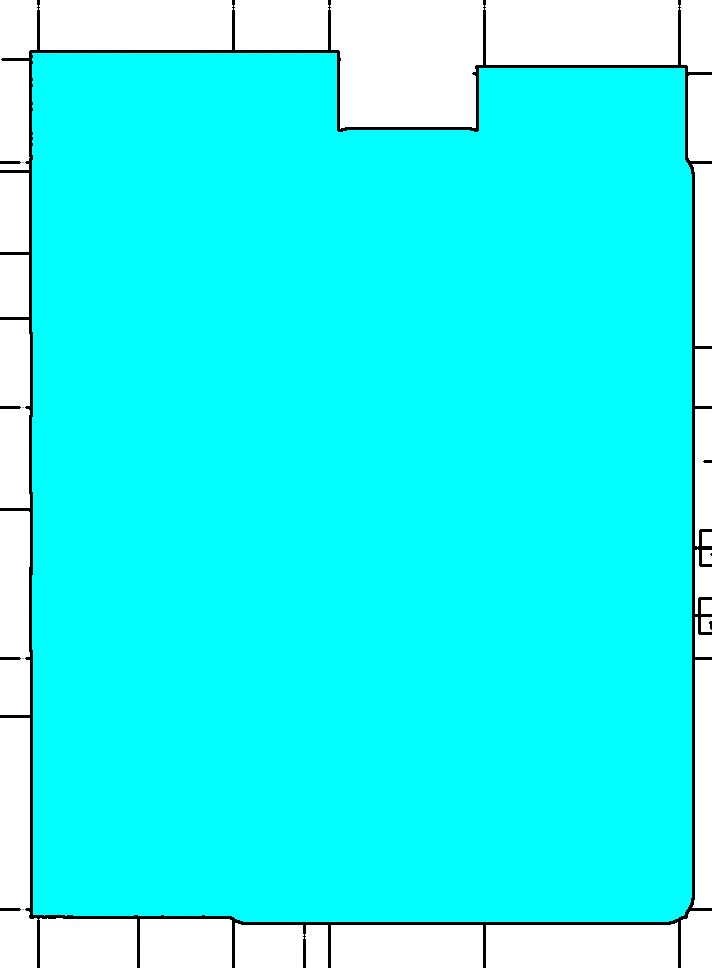

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 컨투어 찾기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 공간별 색상 지정
    colors = [
        (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
        (0, 255, 255), (255, 0, 255), (128, 128, 128), (0, 128, 128)
    ]

    for idx, cnt in enumerate(contours):
        # 공간 영역 채우기
        cv2.drawContours(image, [cnt], 0, colors[idx % len(colors)], -1)

        # 벽 영역 그리기
        cv2.drawContours(image, [cnt], 0, (0, 0, 0), 2)

    return image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (1).jpg


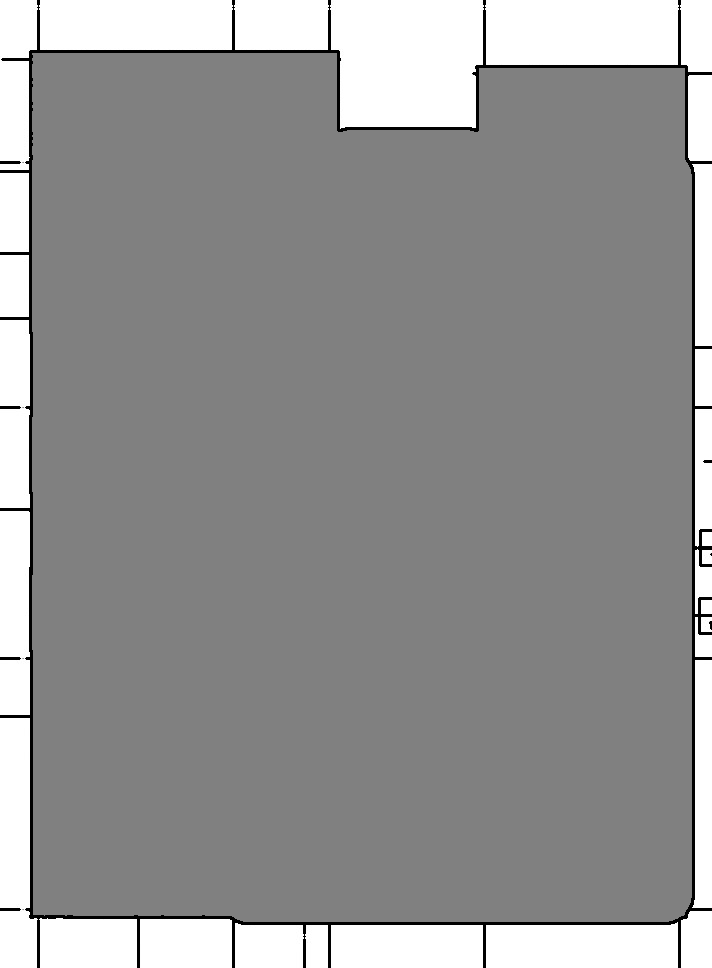

In [ ]:
# 코드 시작
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 컨투어 찾기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 컨투어별 영역 크기 계산
    contour_areas = [cv2.contourArea(cnt) for cnt in contours]
    avg_area = sum(contour_areas) / len(contour_areas)

    for cnt in contours:
        area = cv2.contourArea(cnt)

        # 영역 크기에 따른 색상 지정 (계단실: 노란색, 나머지 실: 회색)
        color = (0, 255, 255) if area < avg_area * 0.5 else (128, 128, 128)

        # 공간 영역 채우기
        cv2.drawContours(image, [cnt], 0, color, -1)

        # 벽 영역 그리기
        cv2.drawContours(image, [cnt], 0, (0, 0, 0), 2)

    return image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

Saving 1.jpg to 1 (2).jpg


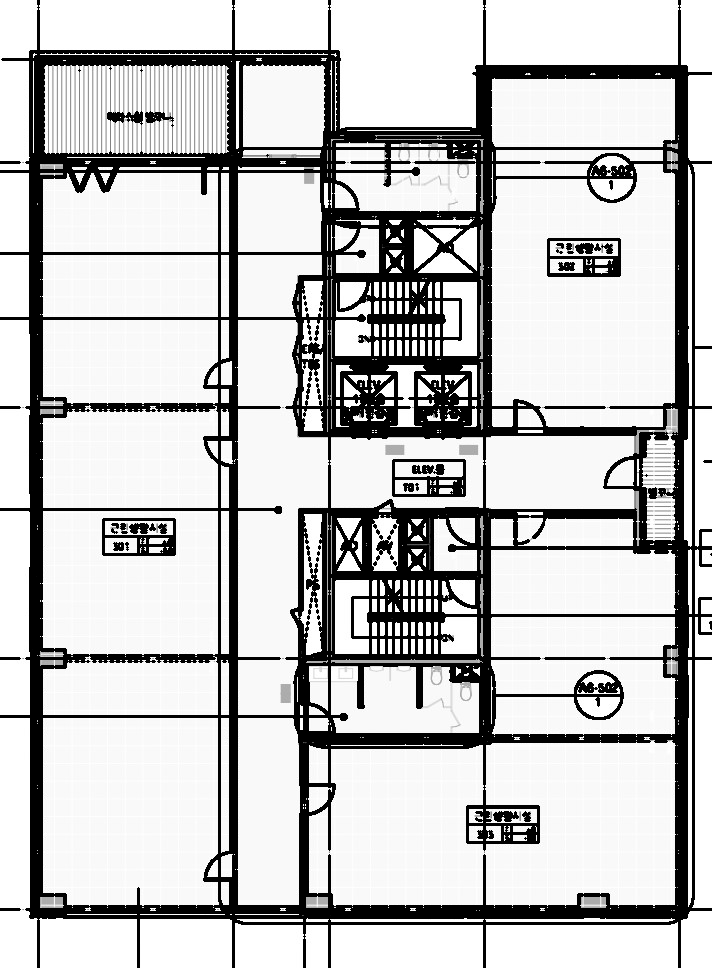

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 컨투어 찾기 (외곽선과 내벽 포함)
    contours, _ = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # 모든 컨투어 그리기 (벽 영역)
    for cnt in contours:
        cv2.drawContours(image, [cnt], 0, (0, 0, 0), 2)

    return image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (3).jpg


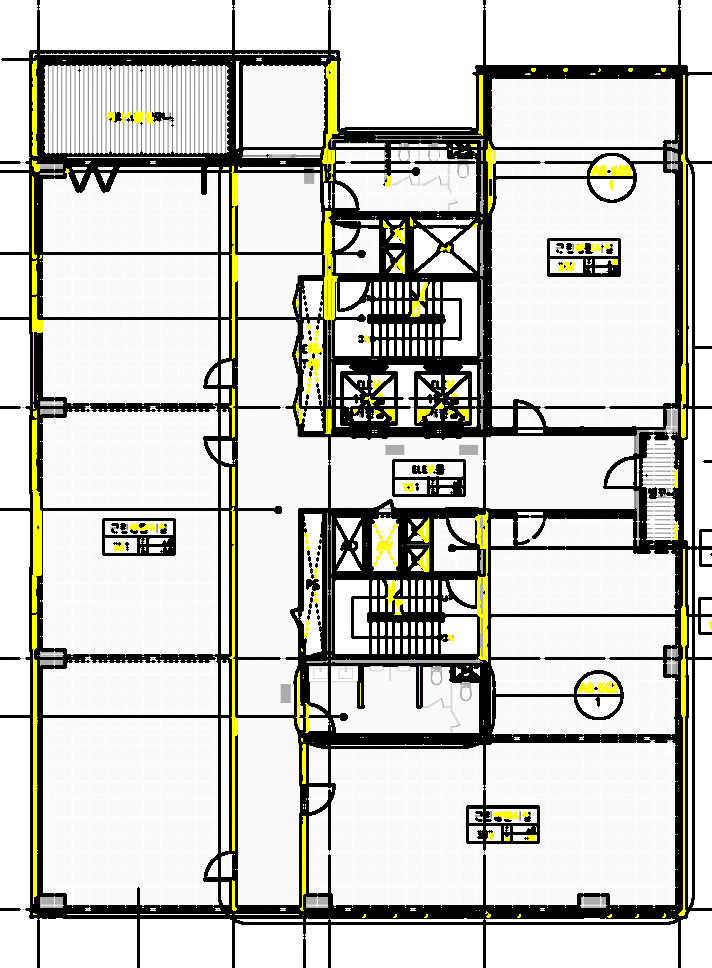

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def is_staircase(binary_image, cnt, threshold=0.3):
    x, y, w, h = cv2.boundingRect(cnt)
    roi = binary_image[y:y+h, x:x+w]

    transitions = 0
    total_pixels = w * h

    for row in roi:
        prev_pixel = row[0]
        for pixel in row[1:]:
            if pixel != prev_pixel:
                transitions += 1
            prev_pixel = pixel

    transition_ratio = transitions / total_pixels
    return transition_ratio > threshold

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 컨투어 찾기 (외곽선과 내벽 포함)
    contours, _ = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # 모든 컨투어 그리기 (벽 영역)
    for cnt in contours:
        color = (0, 255, 255) if is_staircase(binary, cnt) else (0, 0, 0)
        cv2.drawContours(image, [cnt], 0, color, 2)

    return image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (5).jpg


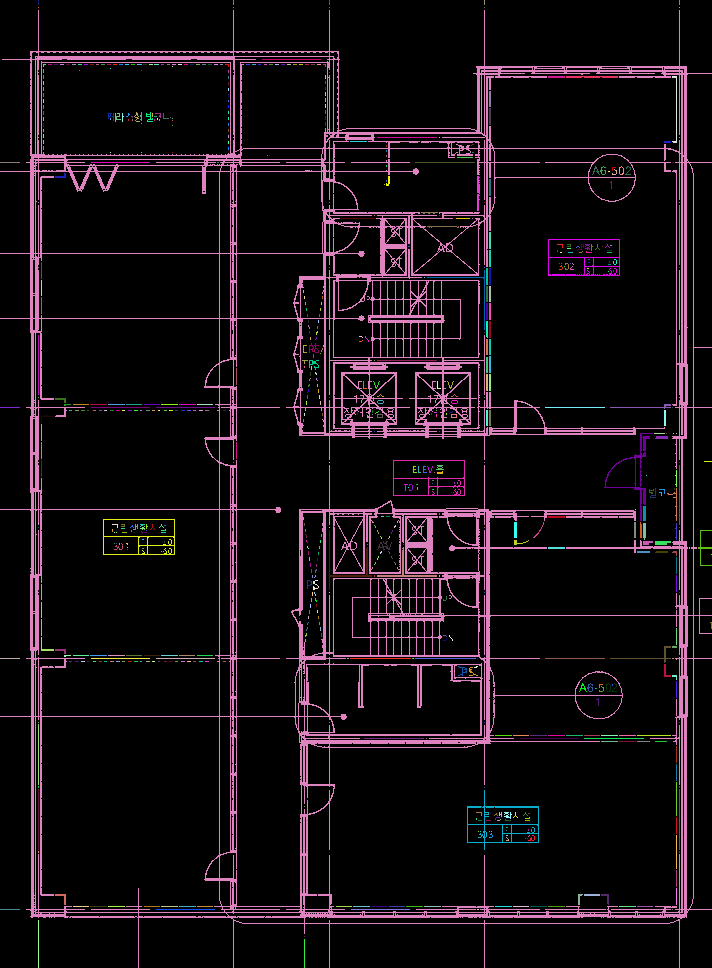

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 라벨링
    num_labels, labels = cv2.connectedComponents(binary)

    # 서로 다른 공간에 무작위 색상 적용
    labeled_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for label in range(1, num_labels):
        labeled_image[labels == label] = np.random.randint(0, 255, 3, dtype=np.uint8)

    return labeled_image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (6).jpg


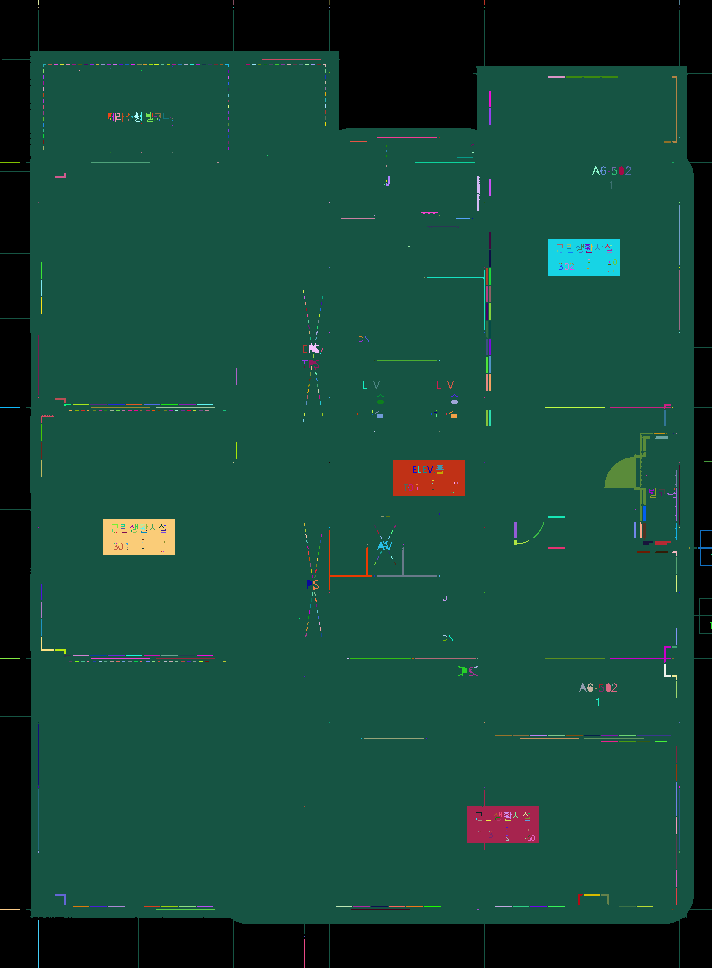

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # 라벨링
    num_labels, labels = cv2.connectedComponents(binary)

    # 서로 다른 공간에 무작위 색상 적용
    labeled_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for label in range(1, num_labels):
        mask = np.zeros_like(gray, dtype=np.uint8)
        mask[labels == label] = 255
        cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if cnts:
            cv2.drawContours(mask, cnts, -1, 255, -1)
            color = np.random.randint(0, 255, 3, dtype=np.uint8)
            labeled_image[mask == 255] = color

    return labeled_image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (7).jpg


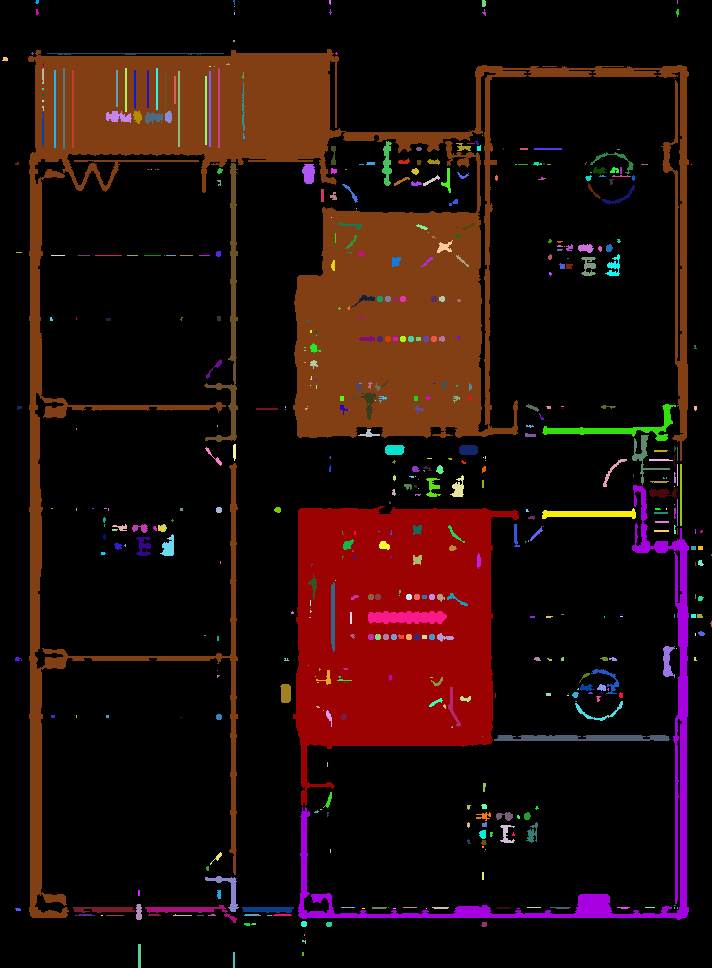

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import urllib.request

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 중간값 블러로 노이즈 제거
    blurred = cv2.medianBlur(gray, 5)

    # 적응형 이진화
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

    # 라벨링
    num_labels, labels = cv2.connectedComponents(binary)

    # 서로 다른 공간에 무작위 색상 적용
    labeled_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for label in range(1, num_labels):
        mask = np.zeros_like(gray, dtype=np.uint8)
        mask[labels == label] = 255
        cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if cnts:
            cv2.drawContours(mask, cnts, -1, 255, -1)
            color = np.random.randint(0, 255, 3, dtype=np.uint8)
            labeled_image[mask == 255] = color

    return labeled_image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (8).jpg


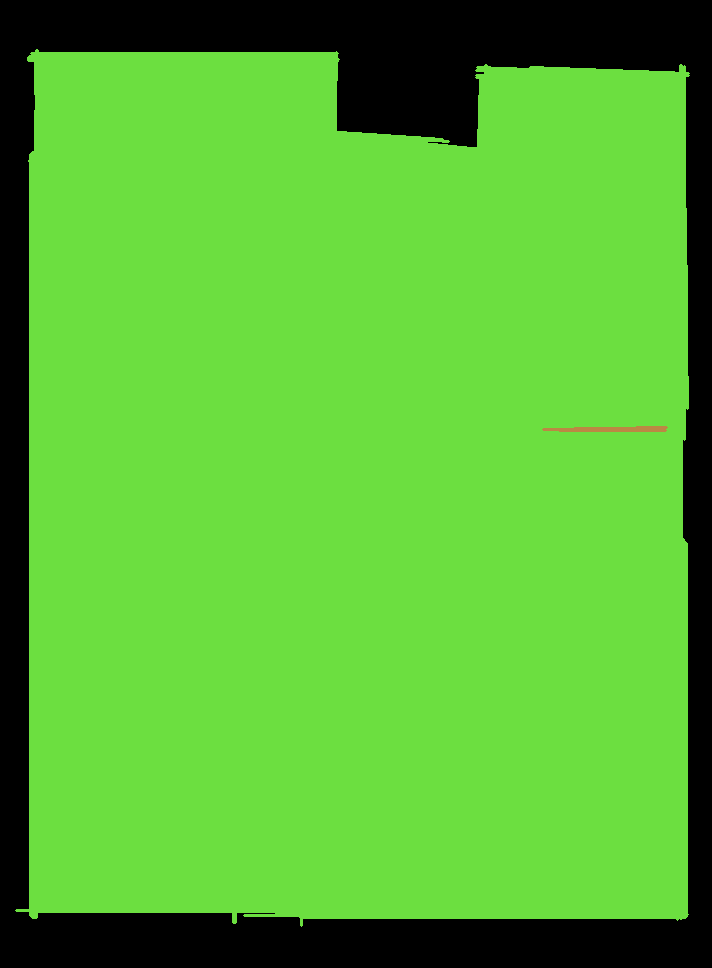

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import urllib.request

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 중간값 블러로 노이즈 제거
    blurred = cv2.medianBlur(gray, 5)

    # 적응형 이진화
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

    # 허프 변환을 사용하여 선분 검출
    lines = cv2.HoughLinesP(binary, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

    # 선분을 이미지에 그리기
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # 선분 이미지를 이진화
    gray_line_image = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
    _, binary_line_image = cv2.threshold(gray_line_image, 128, 255, cv2.THRESH_BINARY)

    # 라벨링
    num_labels, labels = cv2.connectedComponents(binary_line_image)

    # 서로 다른 공간에 무작위 색상 적용
    labeled_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for label in range(1, num_labels):
        mask = np.zeros_like(gray, dtype=np.uint8)
        mask[labels == label] = 255
        cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if cnts:
            cv2.drawContours(mask, cnts, -1, 255, -1)
            color = np.random.randint(0, 255, 3, dtype=np.uint8)
            labeled_image[mask == 255] = color

    return labeled_image

# 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (9).jpg


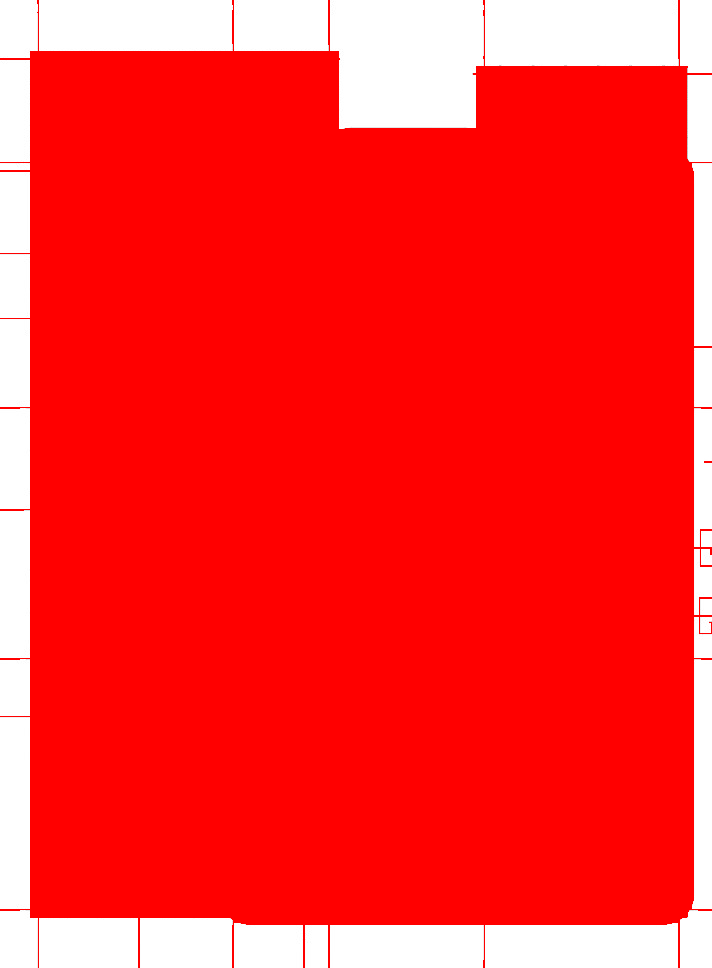

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import urllib.request

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 선을 뚜렷하게 만들기 위해 적응형 이진화 적용
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 5)

    # 모폴로지 연산을 사용하여 공간 외곽선 추출
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # 외곽선을 추출하고 공간 내부를 채우기
    cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filled_image = image.copy()
    for cnt in cnts:
        cv2.drawContours(filled_image, [cnt], -1, (0, 0, 255), -1)

    return filled_image

    # 입력 이미지 업로드
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (11).jpg


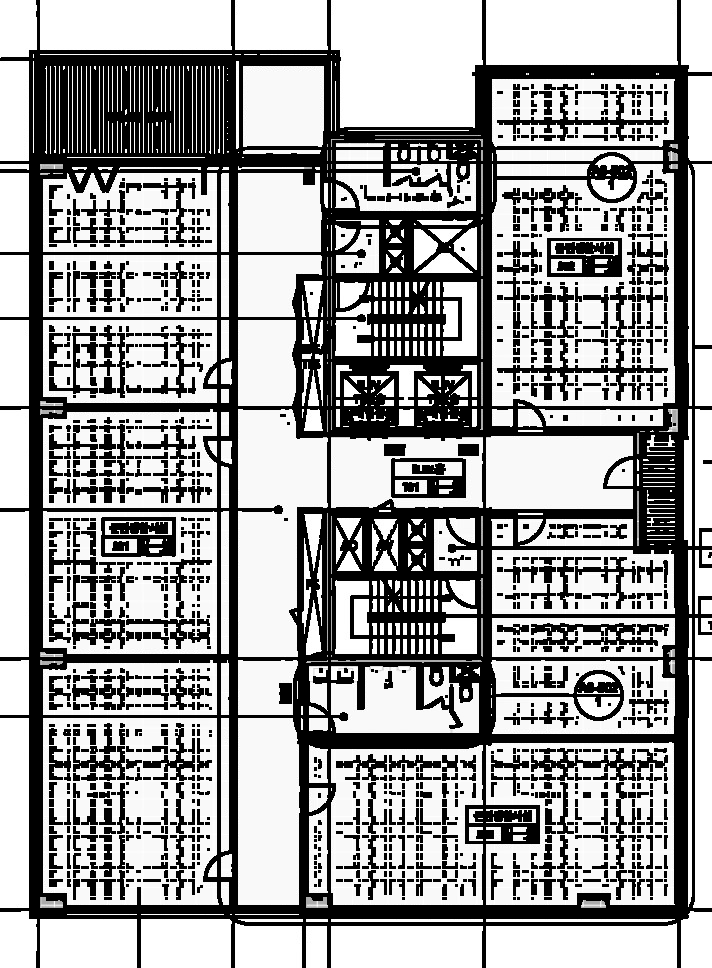

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import urllib.request

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 적응형 이진화 적용
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

    # 선분들을 검출
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated = cv2.dilate(binary, kernel, iterations=1)

    # 선분을 검정색으로 칠하기
    result = image.copy()
    result[dilated == 255] = (0, 0, 0)

    return result

uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (12).jpg


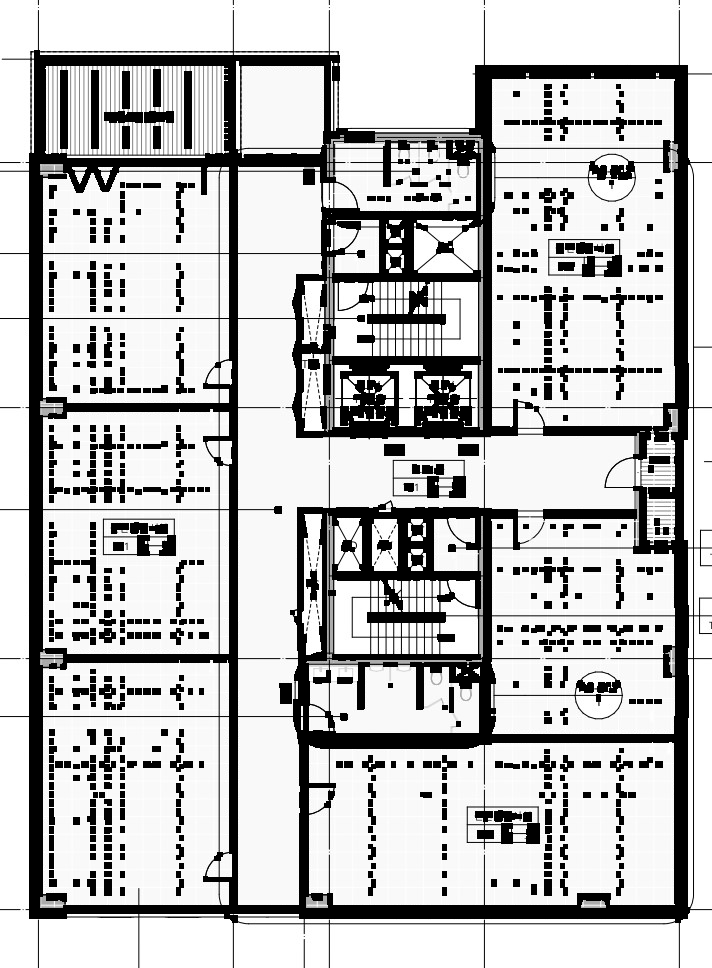

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import urllib.request

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 적응형 이진화 적용
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

    # 선분들을 검출
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated = cv2.dilate(binary, kernel, iterations=1)

    # 노이즈 제거
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    opened = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)

    # 선분을 검정색으로 칠하기
    result = image.copy()
    result[opened == 255] = (0, 0, 0)

    return result

    
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
output_image_path = 'output_floor_plan.png'
cv2.imwrite(output_image_path, processed_image)
files.download(output_image_path)

Saving 1.jpg to 1 (21).jpg


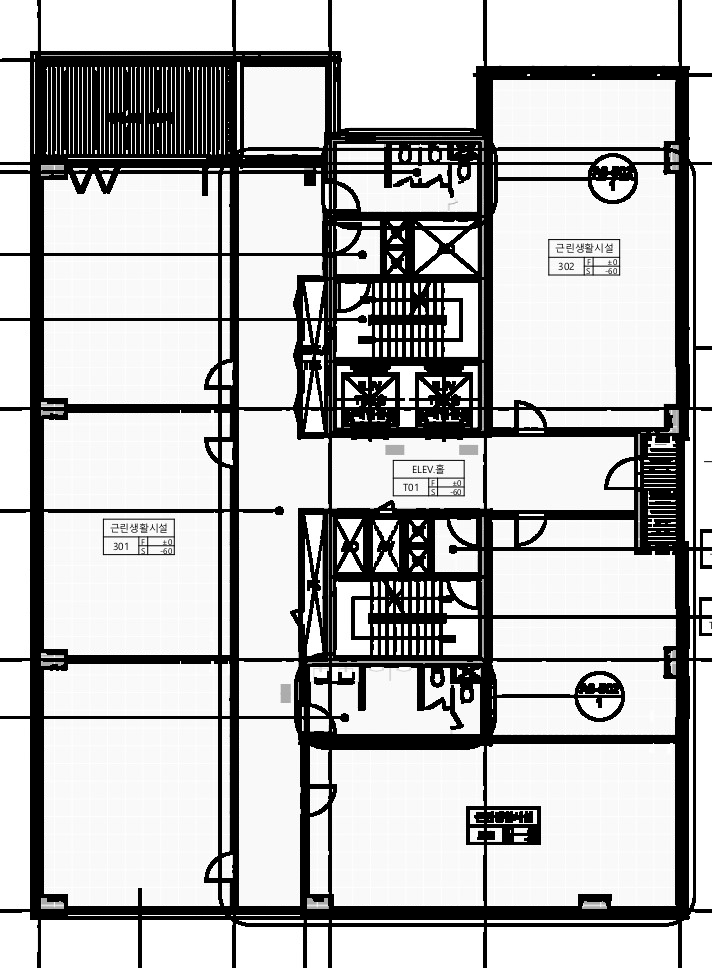

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import urllib.request

def process_floor_plan(image_path):
    # 이미지 읽기 및 그레이스케일로 변환
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 적응형 이진화 적용
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

    # 선분들을 검출
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated = cv2.dilate(binary, kernel, iterations=1)

    # 노이즈 제거
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    opened = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)

    # 면적이 작은 영역 제거
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(opened)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] < 2000:
            opened[labels == i] = 0

    # 선분을 검정색으로 칠하기
    result = image.copy()
    result[opened == 255] = (0, 0, 0)

    return result

uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]

# 이미지 처리 및 결과 표시
processed_image = process_floor_plan(input_image_path)
cv2_imshow(processed_image)

# 결과 이미지 저장 및 다운로드
#output_image_path = 'output_floor_plan.png'
#cv2.imwrite(output_image_path, processed_image)
#files.download(output_image_path)

Upload the input image:


Saving 5.PNG to 5 (6).PNG

Upload the template image:


Saving 계단실.PNG to 계단실 (5).PNG


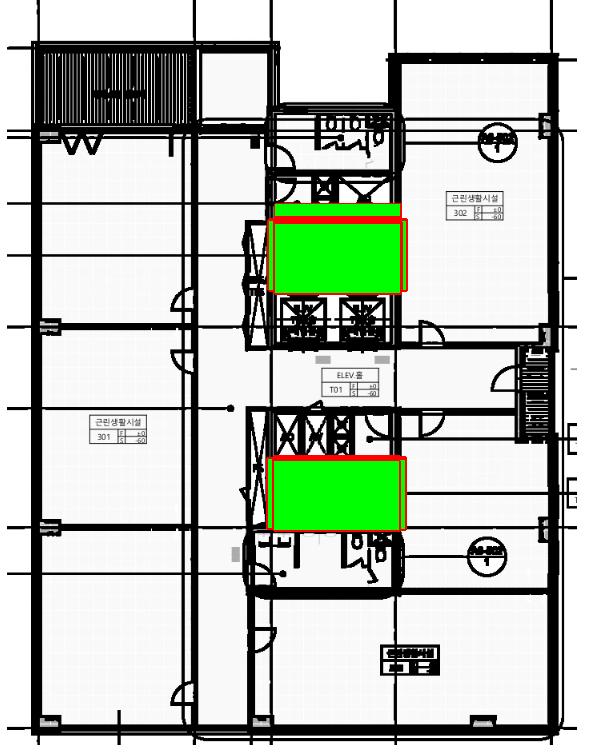

In [ ]:
import cv2
import numpy as np
from google.colab import files

# 업로드할 파일 타입 지정
file_types = ["png", "jpg", "jpeg"]

# 이미지 업로드 함수 정의
def upload_image():
    uploaded = files.upload()
    image_path = None
    for file_name, file_content in uploaded.items():
        # 업로드한 파일의 확장자 가져오기
        extension = file_name.split(".")[-1]
        # 업로드한 파일이 이미지 파일인 경우 파일 경로 반환
        if extension.lower() in file_types:
            image_path = file_name
            with open(image_path, "wb") as f:
                f.write(file_content)
    return image_path

# 입력 이미지 업로드
print("Upload the input image:")
input_image_path = upload_image()

# 템플릿 이미지 업로드
print("\nUpload the template image:")
template_image_path = upload_image()

# 이미지 읽기
image = cv2.imread(input_image_path)
template = cv2.imread(template_image_path)

# 템플릿 매칭
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where(result >= threshold)

# 매칭된 위치에 사각형 그리기
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
# 매칭된 위치 색칠
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1]] = [0, 255, 0]

# 결과 이미지 출력
cv2_imshow(image)

Upload the input image:


Saving 5.PNG to 5 (8).PNG

Upload the template image:


Saving 계단실.PNG to 계단실 (7).PNG


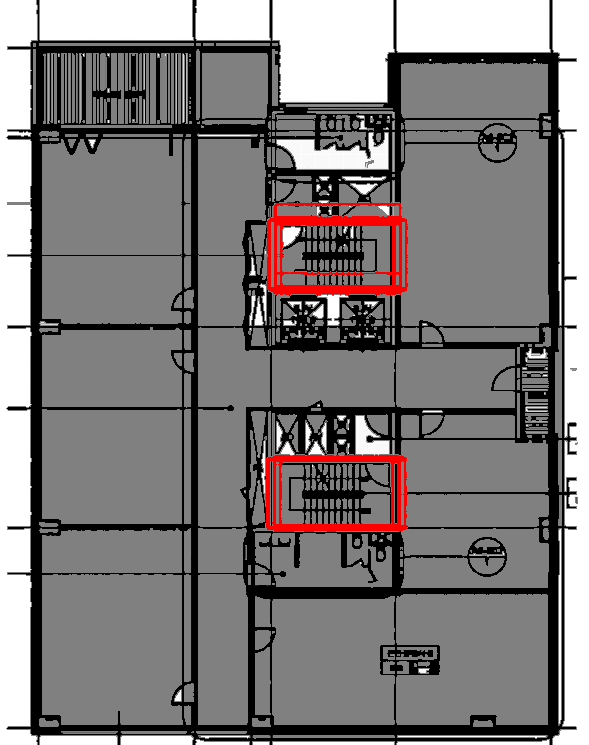

In [ ]:
import cv2
import numpy as np
from google.colab import files

# 업로드할 파일 타입 지정
file_types = ["png", "jpg", "jpeg"]

# 이미지 업로드 함수 정의
def upload_image():
    uploaded = files.upload()
    image_path = None
    for file_name, file_content in uploaded.items():
        # 업로드한 파일의 확장자 가져오기
        extension = file_name.split(".")[-1]
        # 업로드한 파일이 이미지 파일인 경우 파일 경로 반환
        if extension.lower() in file_types:
            image_path = file_name
            with open(image_path, "wb") as f:
                f.write(file_content)
    return image_path

# 입력 이미지 업로드
print("Upload the input image:")
input_image_path = upload_image()

# 템플릿 이미지 업로드
print("\nUpload the template image:")
template_image_path = upload_image()

# 이미지 읽기
image = cv2.imread(input_image_path)
template = cv2.imread(template_image_path)

# 템플릿 매칭
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where(result >= threshold)

# 매칭된 위치에 사각형 그리기
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)

# 에지 검출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

# 외곽선 추출
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (128, 128, 128), -1)

# 결과 이미지 출력
cv2_imshow(image)

Upload the input image:


Saving 5.PNG to 5 (9).PNG

Upload the template image:


Saving 계단실.PNG to 계단실 (8).PNG


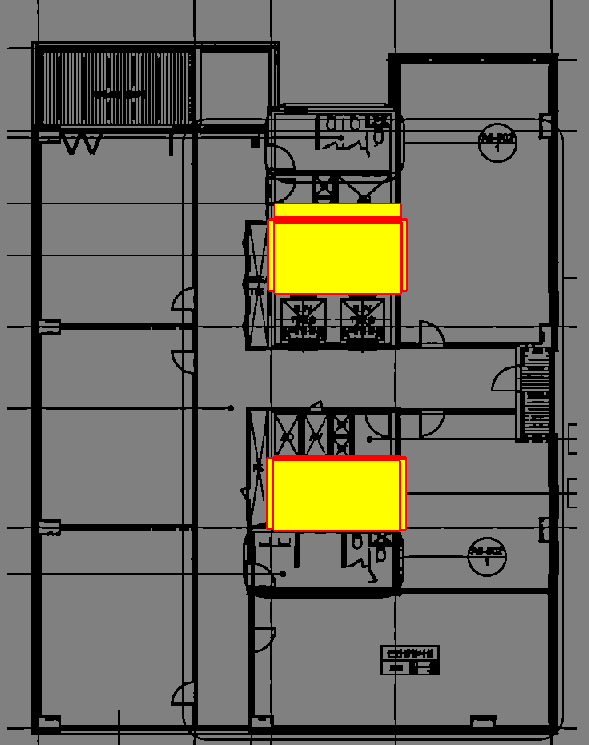

In [ ]:
import cv2
import numpy as np
from google.colab import files

# 업로드할 파일 타입 지정
file_types = ["png", "jpg", "jpeg"]

# 이미지 업로드 함수 정의
def upload_image():
    uploaded = files.upload()
    image_path = None
    for file_name, file_content in uploaded.items():
        # 업로드한 파일의 확장자 가져오기
        extension = file_name.split(".")[-1]
        # 업로드한 파일이 이미지 파일인 경우 파일 경로 반환
        if extension.lower() in file_types:
            image_path = file_name
            with open(image_path, "wb") as f:
                f.write(file_content)
    return image_path

# 입력 이미지 업로드
print("Upload the input image:")
input_image_path = upload_image()

# 템플릿 이미지 업로드
print("\nUpload the template image:")
template_image_path = upload_image()

# 이미지 읽기
image = cv2.imread(input_image_path)
template = cv2.imread(template_image_path)

# 템플릿 매칭
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where(result >= threshold)

# 매칭된 위치에 사각형 그리기
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
    # 매칭된 위치 색칠
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1]] = [0, 255, 0]

# 건물 외곽선을 그리기 위해 이진화 이미지를 만듦
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)[1]

# 외곽선 검출
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 검출된 외곽선 채우기
cv2.drawContours(image, contours, -1, (128, 128, 128), thickness=cv2.FILLED)

# 템플릿으로 매칭된 부분 빨간색으로 칠하기
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1]] = [0, 255, 0]
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1], 2] = 255

# 결과 이미지 출력
cv2_imshow(image)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Upload the input image:


Saving input.PNG to input (15).PNG

Upload the template image folder:
Enter the path of the template image folder: /content/gdrive/My Drive/data/템플릿


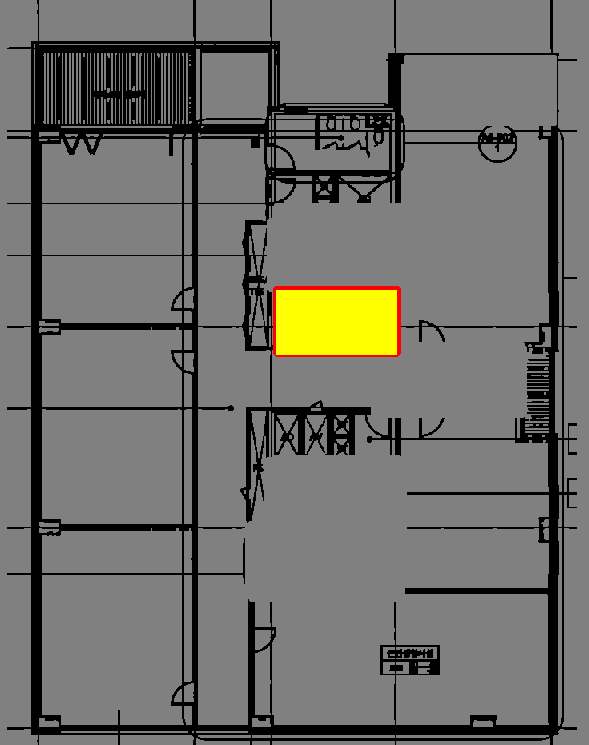

In [ ]:
import cv2
import numpy as np
import os
from google.colab import files


# 업로드할 파일 타입 지정
file_types = ["png", "jpg", "jpeg"]

# 이미지 업로드 함수 정의
def upload_image():
    uploaded = files.upload()
    image_path = None
    for file_name, file_content in uploaded.items():
        # 업로드한 파일의 확장자 가져오기
        extension = file_name.split(".")[-1]
        # 업로드한 파일이 이미지 파일인 경우 파일 경로 반환
        if extension.lower() in file_types:
            image_path = file_name
            with open(image_path, "wb") as f:
                f.write(file_content)
    return image_path

# 입력 이미지 업로드
print("Upload the input image:")
input_image_path = upload_image()

# 템플릿 이미지가 저장된 폴더 업로드
print("\nUpload the template image folder:")
template_folder_path = input("Enter the path of the template image folder: ")

# 폴더 내 템플릿 이미지들을 리스트로 저장
template_files = [os.path.join(template_folder_path, f) for f in os.listdir(template_folder_path) if os.path.isfile(os.path.join(template_folder_path, f)) and f.split(".")[-1].lower() in file_types]

# 이미지 읽기
image = cv2.imread(input_image_path)

# 템플릿 이미지들로 매칭 수행
for template_file in template_files:
    template = cv2.imread(template_file)
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.5
    loc = np.where(result >= threshold)

    # 매칭된 위치에 사각형 그리기
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
        # 매칭된 위치 색칠
        image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1]] = [0, 255, 0]

# 건물 외곽선을 그리기 위해 이진화 이미지를 만듦
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)[1]

# 외곽선 검출
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 검출된 외곽선 채우기
cv2.drawContours(image, contours, -1, (128, 128, 128), thickness=cv2.FILLED)

# 템플릿으로 매칭된 부분 빨간색으로 칠하기
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1]] = [0, 255, 0]
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1], 2] = 255


# 결과 이미지 출력
cv2_imshow(image)


Upload the input image:


Saving input.PNG to input (22).PNG

Upload the template image folder:
Enter the path of the template image folder: /content/gdrive/My Drive/data/템플릿


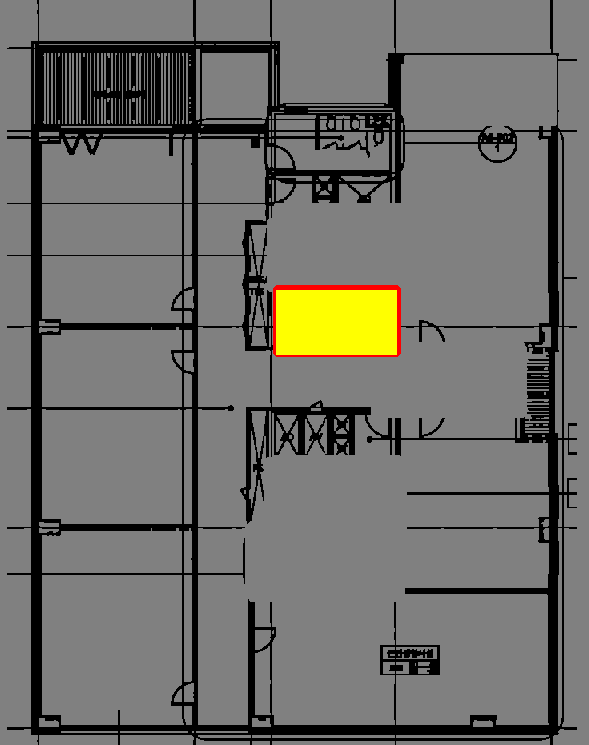

In [ ]:
import cv2
import numpy as np
import os
from google.colab import files


# 업로드할 파일 타입 지정
file_types = ["png", "jpg", "jpeg"]

# 이미지 업로드 함수 정의
def upload_image():
    uploaded = files.upload()
    image_path = None
    for file_name, file_content in uploaded.items():
        # 업로드한 파일의 확장자 가져오기
        extension = file_name.split(".")[-1]
        # 업로드한 파일이 이미지 파일인 경우 파일 경로 반환
        if extension.lower() in file_types:
            image_path = file_name
            with open(image_path, "wb") as f:
                f.write(file_content)
    return image_path

# 입력 이미지 업로드
print("Upload the input image:")
input_image_path = upload_image()

# 템플릿 이미지가 저장된 폴더 업로드
print("\nUpload the template image folder:")
template_folder_path = input("Enter the path of the template image folder: ")

# 폴더 내 템플릿 이미지들을 리스트로 저장
template_files = [os.path.join(template_folder_path, f) for f in os.listdir(template_folder_path) if os.path.isfile(os.path.join(template_folder_path, f)) and f.split(".")[-1].lower() in file_types]

# 이미지 읽기
image = cv2.imread(input_image_path)

# 각 템플릿 이미지로 매칭 수행
for template_file in template_files:
    template = cv2.imread(template_file)
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.5
    loc = np.where(result >= threshold)

    # 매칭된 위치에 사각형 그리기
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
       
# 건물 외곽선을 그리기 위해 이진화 이미지를 만듦
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)[1]

# 외곽선 검출
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 검출된 외곽선 채우기
cv2.drawContours(image, contours, -1, (128, 128, 128), thickness=cv2.FILLED)

# 템플릿으로 매칭된 부분 빨간색으로 칠하기
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 0, 255), 2)
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1]] = [0, 255, 0]
    image[pt[1]:pt[1] + template.shape[0], pt[0]:pt[0] + template.shape[1], 2] = 255

# 결과 이미지 출력
cv2_imshow(image)